                  Importando as Bibliotecas !!

In [360]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import csv
import warnings 
warnings.filterwarnings('ignore')


                       Importando e lendo os dados de onde esta a base 

In [361]:
Base_Dados = pd.read_csv('Z:\DADOS_POWER BI_BUSINESS INTELIGENCE\Python.para.Análise.de.Dados BOM CURSO\9. Projeto Prático 1 - Case Empresas Unicórnios\Startups+in+2021+end.csv')




             Verificando as dimensoes da base EX: Desta Planilha  8 colunas e 936 linhas 

In [362]:
Base_Dados.shape

(936, 8)

                         APRESENTANDO OS REGISTRO DA BASE 

In [363]:
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


                           APRESENTANDO AS COLUNAS DA TABELA 

In [364]:
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

                     RENOMEANDO AS COLUNAS DO INGLES PARA PORTUGUES 

In [365]:
Base_Dados.rename( columns= {
'Unnamed: 0':'Id',
'Company':'Empresas',
'Valuation ($B)':'Valor($)',
'Date Joined':'Data de Adesao ',
'Country' : 'Pais',
'City' :'Cidade' ,
'Industry': 'Setor',
'Select Investors': ' Investidores',
}, inplace=True)

                VERIFICANDO O TIPO DE INFORMAÇAO QUE ESTA NA TABELA / BASE DE DADOS 

In [366]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               936 non-null    int64 
 1   Empresas         936 non-null    object
 2   Valor($)         936 non-null    object
 3   Data de Adesao   936 non-null    object
 4   Pais             936 non-null    object
 5   Cidade           921 non-null    object
 6   Setor            936 non-null    object
 7    Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


                       VERIFICANDO SE TEMOS VALORES NULOS DA TABELA 


In [367]:
Base_Dados.isnull()

,Id,Empresas,Valor($),Data de Adesao,Pais,Cidade,Setor,Investidores
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False
933,False,False,False,False,False,False,False,False
934,False,False,False,False,False,False,False,False


                SOMANDO QUANTOS VALORES NULOS TEMOS NA TABELA  E AONDE SE ENCONTRA OS VALORES NULOS 


In [368]:
Base_Dados.isnull().sum()


Id                  0
Empresas            0
Valor($)            0
Data de Adesao      0
Pais                0
Cidade             15
Setor               0
 Investidores       1
dtype: int64

                  GERANDO UM GRAFICO PARA VERIFICAR OS VALORES NULOS 

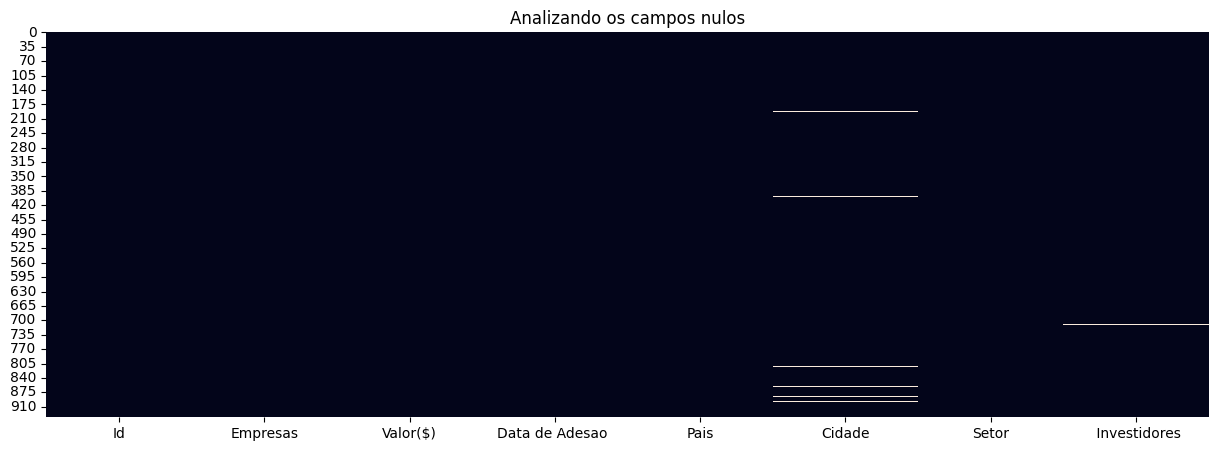

In [369]:
plt.figure(figsize=(15,5))
plt.title('Analizando os campos nulos' )
## sns.heatmap( Base_Dados.isnull());com a barra lateral 
sns.heatmap( Base_Dados.isnull(), cbar=False ); ##sem a barra lateral 


                ANALISANDO QUANTOS VALORES UNICOS HA NA  TABELAS

In [370]:
Base_Dados.nunique()

Id                 936
Empresas           935
Valor($)           192
Data de Adesao     589
Pais                47
Cidade             239
Setor               17
 Investidores      920
dtype: int64

             ANALISANDO MAIS VALORES UNICOS NESTE  EXEMPLO USAMOS O 'SETOR '.

In [371]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

        AGORA CONTAMOS O PARAMETRO "SETOR" PARA SABER QUANTAS EMPRESAS HA NESTE SETOR EXPECIFICO 

In [372]:
Base_Dados['Setor'].value_counts()

Setor
Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

                  AGORA APRESENTAMOS O RANK MUNDIAL  POR SETOR 

In [373]:
Base_Dados['Setor'].value_counts(normalize= True)

Setor
Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: proportion, dtype: float64

                    APRESENTAMOS AGORA DE FORMA VISUAL E GRAFICA 

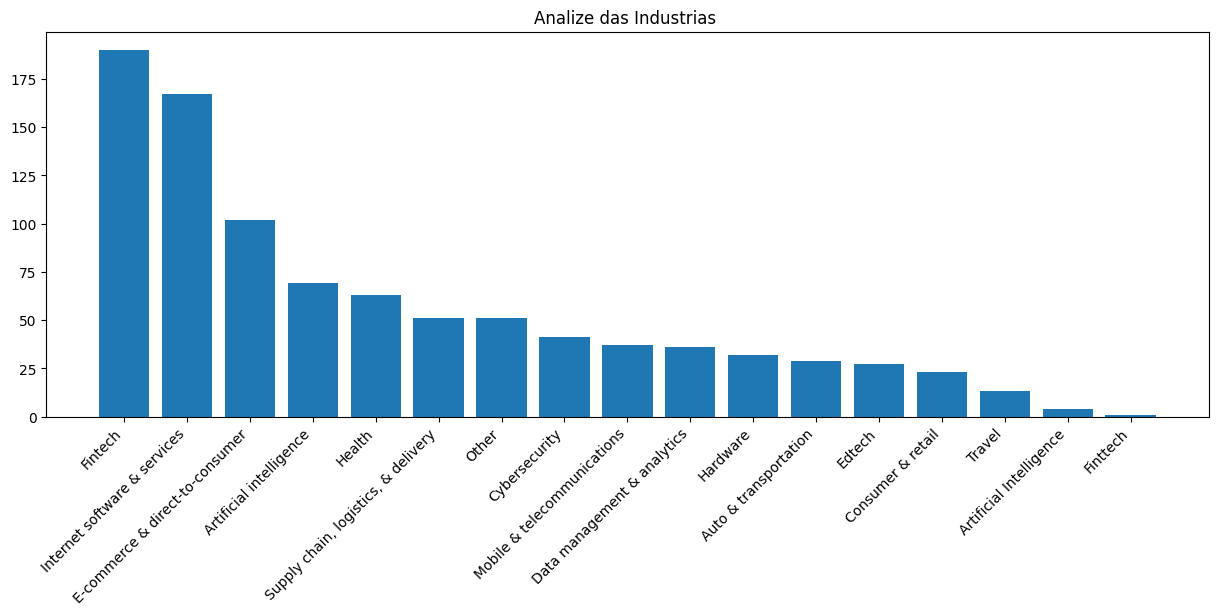

In [374]:
plt.figure(figsize=(15,5))
plt.title('Analize das Industrias ' )
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks(rotation =45, ha= 'right');


                    CONTANDOS OS PAISES ONDE ESTAS EMPRESAS SE ENCONTRA 

In [375]:
Base_Dados ['Pais'].value_counts()

Pais
United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States, 

        AGORA APRESENTAMOS A PORCENTAGEM  DE EMPRESAS POR SETOR EM CADA PAIS 

In [376]:
Base_Dados ['Pais'].value_counts(normalize= True)

Pais
United States           0.509615
China                   0.180556
India                   0.054487
United Kingdom          0.039530
Germany                 0.024573
Israel                  0.022436
France                  0.020299
Canada                  0.016026
Brazil                  0.016026
South Korea             0.011752
Singapore               0.011752
Hong Kong               0.007479
Japan                   0.006410
Australia               0.006410
Mexico                  0.005342
Netherlands             0.005342
Indonesia               0.004274
Spain                   0.004274
Sweden                  0.004274
Switzerland             0.004274
Ireland                 0.003205
United Arab Emirates    0.003205
Norway                  0.003205
Belgium                 0.002137
Thailand                0.002137
Denmark                 0.002137
Philippines             0.002137
Finland                 0.002137
Colombia                0.002137
South Africa            0.002137
Turke

                    AGORA FORMATAMOS A PORCENTAGEM 

In [377]:
Analise= Base_Dados ['Pais'].value_counts(normalize= True)*100

In [378]:
Analise 

Pais
United States           50.961538
China                   18.055556
India                    5.448718
United Kingdom           3.952991
Germany                  2.457265
Israel                   2.243590
France                   2.029915
Canada                   1.602564
Brazil                   1.602564
South Korea              1.175214
Singapore                1.175214
Hong Kong                0.747863
Japan                    0.641026
Australia                0.641026
Mexico                   0.534188
Netherlands              0.534188
Indonesia                0.427350
Spain                    0.427350
Sweden                   0.427350
Switzerland              0.427350
Ireland                  0.320513
United Arab Emirates     0.320513
Norway                   0.320513
Belgium                  0.213675
Thailand                 0.213675
Denmark                  0.213675
Philippines              0.213675
Finland                  0.213675
Colombia                 0.213675
South Afr

                APRESENTAMOS AGORA EM FORMA  DE TABELA A PORCENTAGEM  

In [382]:
Analise.head(10),

(Pais
 United States     51.0
 China             18.1
 India              5.4
 United Kingdom     4.0
 Germany            2.5
 Israel             2.2
 France             2.0
 Canada             1.6
 Brazil             1.6
 South Korea        1.2
 Name: proportion, dtype: float64,)

             AGORA APRESENTAMOS OS PAISES TOP 10 GERADORES DE UNICORNIOS 

In [384]:
Analise.index[0:10]

Index(['United States', 'China', 'India', 'United Kingdom', 'Germany',
       'Israel', 'France', 'Canada', 'Brazil', 'South Korea'],
      dtype='object', name='Pais')

                 APRESENTAMOS AGORA A DATA DE ADESAO DE CADA UNICORNIO 

In [385]:
Base_Dados['Data de Adesao ']

0        4/7/2017
1       12/1/2012
2       1/23/2014
3      12/12/2011
4        1/8/2018
          ...    
931     12/6/2021
932     12/7/2021
933     12/1/2021
934     12/1/2021
935     12/7/2021
Name: Data de Adesao , Length: 936, dtype: object

                             FORMATANDO A DATA DE ADESAO

In [386]:
Base_Dados['Data de Adesao ']= pd.to_datetime(Base_Dados['Data de Adesao '])

Base_Dados['Data de Adesao '].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesao , dtype: datetime64[ns]

In [387]:

Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesao ']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesao ']).year

Base_Dados.head()


,Id,Empresas,Valor($),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


                          APRESENTANDO AS COLUNAS 

In [388]:
print(Base_Dados.columns)

Index(['Id', 'Empresas', 'Valor($)', 'Data de Adesao ', 'Pais', 'Cidade',
       'Setor', ' Investidores', 'Mes', 'Ano'],
      dtype='object')


             AGRUPANDO AS COLUNAS Pais','Ano','Mes','Empresas'

In [389]:
 ## TABELA ANALITICA 

Base_Dados.groupby( by= ['Pais','Ano','Mes','Empresas'] ).count()['Id']

Pais            Ano   Mes  Empresas     
Argentina       2021  8    Uala             1
Australia       2018  1    Canva            1
                2019  3    Airwallex        1
                2021  5    SafetyCulture    1
                      7    Culture Amp      1
                                           ..
United States   2021  12   Panther Labs     1
                           ReliaQuest       1
                           YipitData        1
United States,  2021  9    TrialSpark       1
Vietnam         2021  10   Sky Mavis        1
Name: Id, Length: 936, dtype: int64

                         APRESENTANDO AS COLUNAS AGRUPADAS 

In [390]:
Analise_agrupada = Base_Dados.groupby( by= ['Pais','Ano','Mes','Empresas'] ).count()['Id'].reset_index()

Analise_agrupada

,Pais,Ano,Mes,Empresas,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


            APRESENTANDO AS COLUNAS AGRUPADAS E APRESENTANDO AS EMPRESAS DE UM LOCAL ESPECIFICO 

In [391]:
Analise_agrupada.loc[
Analise_agrupada['Pais']=='Brazil'
]

,Pais,Ano,Mes,Empresas,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


                  APRESENTANDO AS EMPRESAS COM MAIOR VALORES 

In [392]:
Base_Dados['Valor($)'] = pd.to_numeric( Base_Dados['Valor($)'].apply ( lambda Linha :Linha.replace ('$','')))

Base_Dados.head()

,Id,Empresas,Valor($),Data de Adesao,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


             AGORA AGRUPANDO E CLASSIFICANDO EM ORDEM ALFABETICA 

In [393]:
## Base_Dados.groupby( by= ['Pais','Setor'] ).sum()
Base_Dados.groupby(by=['Pais', 'Setor']).agg({'Pais': 'sum', 'Setor': 'sum'})



Pais   
Pais           Setor                                                                                    
Argentina      Fintech                                                                      Argentina  \
Australia      E-commerce & direct-to-consumer                                              Australia   
               Fintech                                                                      Australia   
               Internet software & services                      AustraliaAustraliaAustraliaAustralia   
Austria        Edtech                                                                         Austria   
...                                                                                               ...   
United States  Other                                United StatesUnited StatesUnited StatesUnited ...   
               Supply chain, logistics, & delivery  United StatesUnited StatesUnited StatesUnited ...   
               Travel                                                      United StatesUnited States   
United States, Health                                                                  United States,   
Vietnam        Internet software & services                                                   Vietnam   

                                                                                                Setor  
Pais           Setor                                                                                   
Argentina      Fintech                                                                        Fintech  
Australia      E-commerce & direct-to-consumer                        E-commerce & direct-to-consumer  
               Fintech                                                                        Fintech  
               Internet software & services         Internet software & servicesInternet software ...  
Austria        Edtech                                                                          Edtech  
...                                                                                               ...  
United States  Other                                OtherOtherOtherOtherOtherOtherOtherOtherOtherO...  
               Supply chain, logistics, & delivery  Supply chain, logistics, & deliverySupply chai...  
               Travel                                                                    TravelTravel  
United States, Health                                                                          Health  
Vietnam        Internet software & services                              Internet software & services  

[183 rows x 2 columns]

              AGRUPADA EM ORDEM ALFABETICA E VALOR 

In [394]:

## Base_Dados['Valor($)'] = pd.to_numeric(Base_Dados['Valor($)']) ##
Analise_Pais = Base_Dados.groupby('Pais')['Valor($)'].sum().reset_index()

Analise_Pais 

,Pais,Valor($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
5,Brazil,61.05
6,Canada,37.73
7,Chile,1.50
8,China,569.48
9,Colombia,6.40


               AGORA APRESENTANDO DO MAIOR VALOR  PARA MENOR VALOR 

In [395]:
Analise_Valor =  Analise_Pais .sort_values('Valor($)',ascending=False)
Analise_Valor

,Pais,Valor($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


               AGORA APRESENTANDO EM GRAFICO DE MAIOR VALOR  PARA O MENOR VALOR 

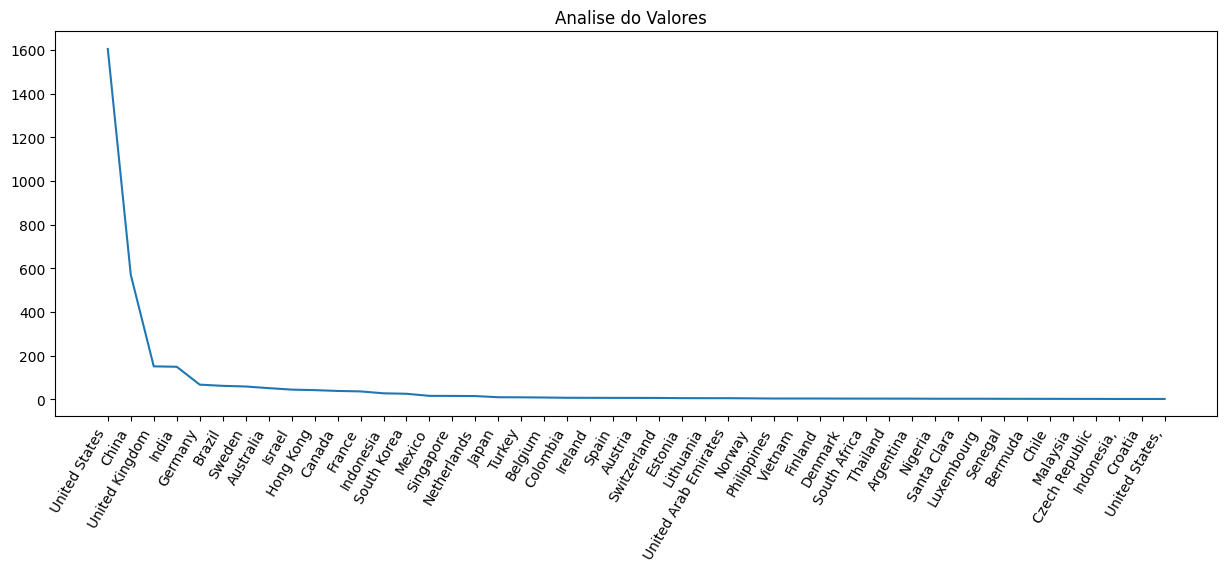

In [396]:
plt.figure(figsize=(15,5))
plt.xticks(rotation =60, ha= 'right');
plt.title('Analise do Valores  ' )

plt.plot ( Analise_Valor ['Pais'], Analise_Valor['Valor($)'])

                  APRESENTANDO EM FORMA DE GRAFICO DE BARRAS 

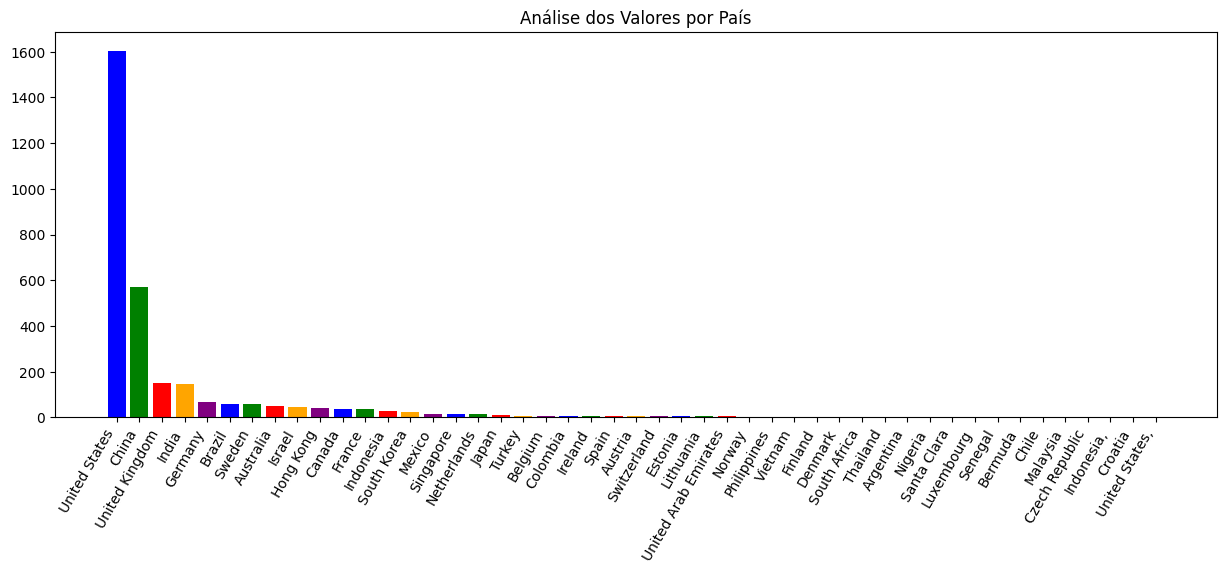

In [397]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.xticks(rotation=60, ha='right')
plt.title('Análise dos Valores por País')

# Definindo as cores das barras
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.bar(Analise_Valor['Pais'], Analise_Valor['Valor($)'], color=colors)

plt.show()


              APRESENTANDO O GRAFICO COM AS 20 MAIORES EMPRESA POR VALOR 

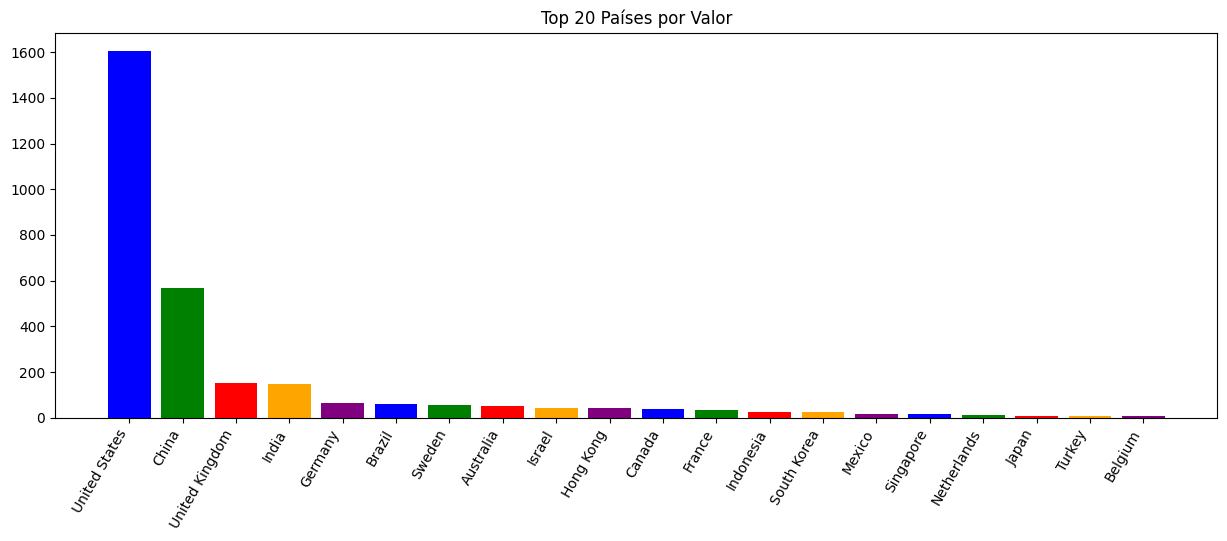

In [398]:
import matplotlib.pyplot as plt

# Ordenar os dados por valor em ordem decrescente
top_20_paises = Analise_Valor.sort_values(by='Valor($)', ascending=False).head(20)

plt.figure(figsize=(15, 5))
plt.xticks(rotation=60, ha='right')
plt.title('Top 20 Países por Valor')

# Definindo as cores das barras
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.bar(top_20_paises['Pais'], top_20_paises['Valor($)'], color=colors)

plt.show()


                     AGORA SOMADO O VALOR E FORMATADO O GRAFICO COM SEUS VALORES EM DOLAR 

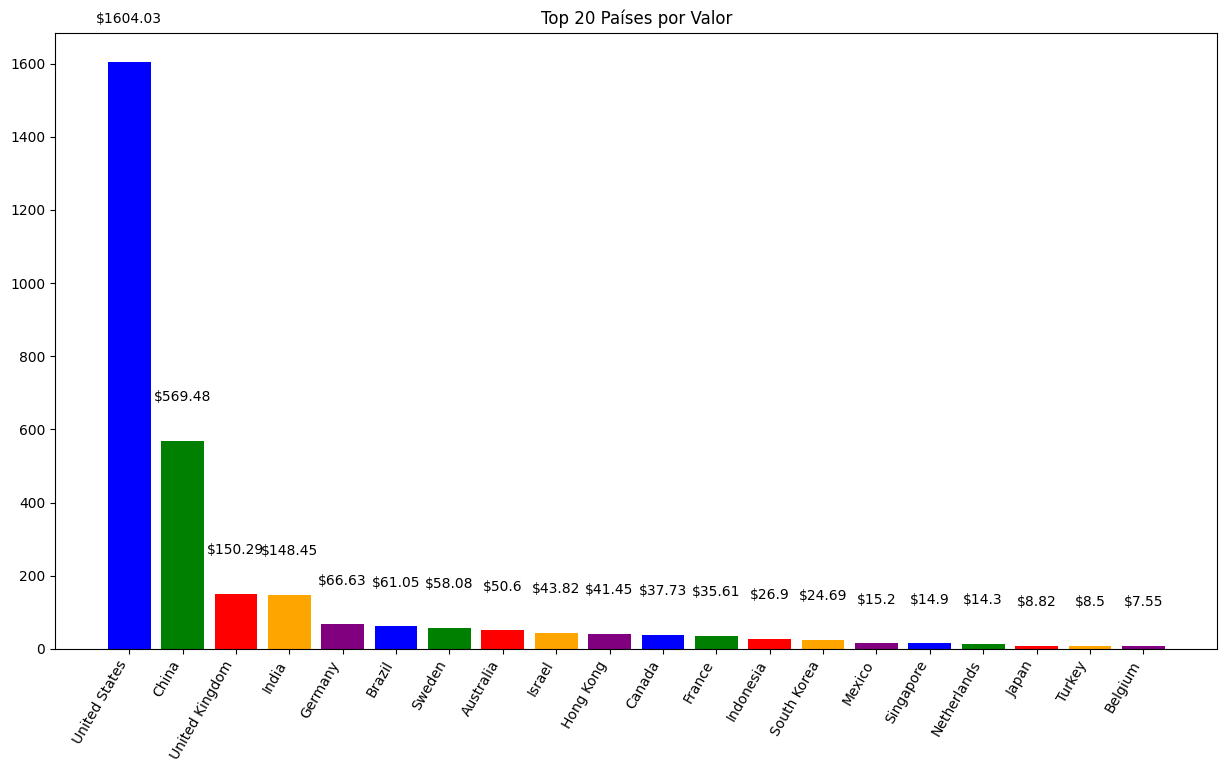

In [399]:
import matplotlib.pyplot as plt

# Ordenar os dados por valor em ordem decrescente
top_20_paises = Analise_Valor.sort_values(by='Valor($)', ascending=False).head(20)

plt.figure(figsize=(15, 8))
plt.xticks(rotation=60, ha='right')
plt.title('Top 20 Países por Valor')

# Definindo as cores das barras
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plotar as barras
plt.bar(top_20_paises['Pais'], top_20_paises['Valor($)'], color=colors)

# Adicionar a legenda dos valores acima de cada barra
for i, valor in enumerate(top_20_paises['Valor($)']):
    plt.text(i, valor + 100, f'${valor}', ha='center', va='bottom')

plt.show()

